<a href="https://colab.research.google.com/github/gusya-soc/notebook_collection/blob/main/pokemon_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
wget https://www.dropbox.com/s/lr5ffazv2sjl3nz/pokemon.csv?dl=1 -O pokemon.csv

--2020-02-03 00:16:20--  https://www.dropbox.com/s/lr5ffazv2sjl3nz/pokemon.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/lr5ffazv2sjl3nz/pokemon.csv [following]
--2020-02-03 00:16:21--  https://www.dropbox.com/s/dl/lr5ffazv2sjl3nz/pokemon.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8bf333fa5720b5dc199f0ba020.dl.dropboxusercontent.com/cd/0/get/AxUngBQtafC5ifi5oBELyKlLv3eG4PfzJnrYPop1DHjcN1Hw96yz3qdG_LI5s6niQtyGqEJcQqp6vk3-x9AXT4QDOy6qlTTJcXQ9EjkTDTO9z33ArNPB_P5CXUQ9VmGmSxM/file?dl=1# [following]
--2020-02-03 00:16:21--  https://uc8bf333fa5720b5dc199f0ba020.dl.dropboxusercontent.com/cd/0/get/AxUngBQtafC5ifi5oBELyKlLv3eG4PfzJnrYPop1DHjcN1Hw96yz3qdG_LI5s6niQtyGqEJcQqp6vk3-x9AXT4QDOy6qlTTJcXQ9EjkTDTO9z33A

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:

class read_csv():
  def __init__(self):
    self.path = './pokemon.csv'
    self.csv = pandas.read_csv(self.path,header=0)

# Image datasets from kazuya sensei

In [ ]:
# %%bash
# unzip -t /gdrive/My\ Drive/dataset.zip


In [ ]:
# %%bash 
# cd /dataset/
# ls -l | wc -l

# get Image datasets from web

もらった画像は保存しったから、毎回ダウンロードの苦労から解放

[データセット](https://drive.google.com/open?id=1M-JmMJCNwgfV9v5WDV4Tk4NgAK2OJqYQ)

```
構造
img/
  img/126Magmar.png
  img/711Gourgeist-Average.png
  img/....  

  img/ID+Name_en.png
```



In [ ]:
%%bash
tar -xvf /gdrive/My\ Drive/img.tar

img/
img/117Seadra.png
img/211Qwilfish.png
img/304Aron.png
img/293Whismur.png
img/107Hitmonchan.png
img/370Luvdisc.png
img/239Elekid.png
img/344Claydol.png
img/102Exeggcute.png
img/736Grubbin.png
img/777Togedemaru.png
img/430Honchkrow.png
img/494Victini.png
img/356Dusclops.png
img/656Froakie.png
img/499Pignite.png
img/169Crobat.png
img/229Houndoom.png
img/022Fearow.png
img/663Talonflame.png
img/401Kricketot.png
img/288Vigoroth.png
img/200Misdreavus.png
img/424Ambipom.png
img/101Electrode.png
img/321Wailord.png
img/084Doduo.png
img/273Seedot.png
img/110Weezing.png
img/478Froslass.png
img/112Rhydon.png
img/116Horsea.png
img/040Wigglytuff.png
img/462Magnezone.png
img/508Stoutland.png
img/330Flygon.png
img/800Necrozma.png
img/655Delphox.png
img/652Chesnaught.png
img/182Bellossom.png
img/194Wooper.png
img/412Burmy.png
img/270Lotad.png
img/504Patrat.png
img/352Kecleon.png
img/233Porygon2.png
img/445Garchomp.png
img/785Tapu-Koko.png
img/450Hippowdon.png
img/752Araquanid.png
img/157Typhlosion.

In [ ]:
%%bash
cd img
ls -l |wc -l

811


余りの二つは、名前が間違って保存したもの

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import os
from threading import *
import pandas
import random

In [ ]:
from lxml import etree
import re
from time import sleep

In [ ]:
class get_img():
  def __init__(self):
    super().__init__()
    # r = requests.get('http://wiki.52poke.com/wiki/File:013Weedle.png')
    
    miss = []
    for i in read_csv().csv.values:
      index = i[0]
      name = i[9]
      r = requests.get("http://wiki.52poke.com/wiki/File:{:0>3d}{}.png".format(index,name))

      if r.status_code == 404:
        print("404.Name = {}".format(name))
        miss.append(i)
        sleep(0.2)
        continue
      xmlcontent = etree.HTML(r.text)
      urllist = xmlcontent.xpath("//div[@id='file']/a/@href")
      urllist = re.findall(r'media.*\.png',urllist[0])
      r = requests.get("http://"+urllist[0])
      print(urllist)
      # test = str(urllist)
      # print("url:::",test)
      # if index == 200:
      #   break
      path = "./img/{:0>3d}{}.png".format(index,name)
      if r.status_code == 200 and not(os.path.exists(path)):
        with open(path,"wb") as F:
          F.write(r.content)
      elif r.status_code == 404:
        print("404.Name = {}".format(name))
        sleep(0.2)
        continue
      else:
        print("already existed:"+path)
        continue
    print("miss target as:\n",miss)

##画像をフォルダに入れる

In [ ]:
for i in read_csv().csv.values:
  index = i[0]
  name = i[1]
  raw_name = i[4]
  if not os.path.exists("./dataset"):
    os.mkdir("./dataset")
  path = "./dataset/{:0>3d}{}".format(index,name)
  raw_path = "./img/{:0>3d}{}.png".format(index,raw_name)
  if not os.path.exists(path):
    os.mkdir(path)
  with open(raw_path,'rb') as R:
    with open(path+"/01.png",'wb') as F:
      F.write(R.read())

In [ ]:
type(read_csv().csv["ID"].values)

numpy.ndarray

# 新しいセクション

##missした画像を手でもらう

In [ ]:
# #手动获取缺失图片
# r = requests.get("https://wiki.52poke.com/wiki/File:788Tapu_Fini.png")
# xmlcontent = etree.HTML(r.text)
# urllist = xmlcontent.xpath("//div[@id='file']/a/@href")
# urllist = re.findall(r'media.*\.png',urllist[0])
# r = requests.get("http://"+urllist[0])
# path = "./img/788Tapu-Fini.png"
# if r.status_code == 200 and not(os.path.exists(path)):
#   with open(path,"wb") as F:
#     F.write(r.content)

#ツール



In [ ]:
class show_image():
  def __init__(self,path,color=True):
    super().__init__
    with Image.open(os.path.join(path)) as img:
      plt.figure("Image")
      plt.imshow(img) if color else plt.imshow(img,cmap='gray')
      plt.axis('on')
      plt.title('image')
      plt.show()

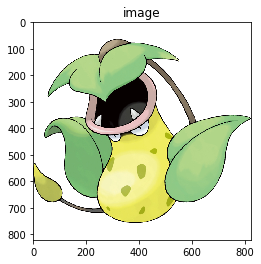

In [ ]:
show_image('./img/071Victreebel.png')

In [ ]:
def random_img():
  path = './img/'
  listdir = os.listdir(path)
  rd = random.randint(0,len(listdir))
  print(listdir[rd])
  return listdir[rd]

076Golem.png


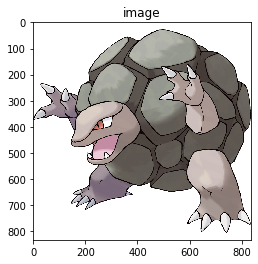

In [ ]:
show_image('./img/{}'.format(random_img()))

# 言語判断(廃棄)

説明：精度が低い、フランス語と英語の判断が難しかった

多言語対応するために使ってみるやつ

もし入力の言葉はどの言語か分かれば検索スピードが速いと思ったが

結局全部の言語の列でマーチするになっちゃった

In [ ]:
!pip install langid

     |████████████████████████████████| 1.9MB 4.9MB/s 
  Created wheel for langid: filename=langid-1.1.6-cp36-none-any.whl size=1941190 sha256=81e1eb1c16d58715a76433d721cf52f100da3f9f837c1782e1d3699fb05c6dba
  Stored in directory: /root/.cache/pip/wheels/29/bc/61/50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


In [ ]:
from langid.langid import LanguageIdentifier as LIF, model

In [ ]:
lid = LIF.from_modelstring(model,norm_probs=True)
lid.classify("测试文本")

('zh', 0.9999772194174593)

# Main

説明：課題は`low_score`と`high_score`二つのクラスに分類しました

low_scoreは課題1-8,high_scoreは9から

使い方は `low_score(case=課題number)`で、対応の課題の関数を実行します。

繰り返しはありませんので、ぞれぞれを実行してお願いします。

ご不便おかけし申し訳ございません

switch機能を実現するために、エラー処理はBUGがあります。いじめないでください！

In [ ]:
class low_score(read_csv):
  def __init__(self,case):
    super().__init__()
    self.case = case
    case_dir = {1:self.p1,2:self.p2,3:self.p3,4:self.p4,5:self.p5,6:self.p6,7:self.p7,8:self.p8}
    print(case_dir[self.case]())
  def p1(self):
    print("print csv")
    print(self.csv)
    return 0

  def p2(self):
    print("print head()")
    get_input = input("head(num):")
    return self.csv.head(int(get_input))

  def p3(self):
    print("HP sort")
    return self.csv.sort_values(['HP'],ascending=False)
    
  def p4(self):
    print("Attack over 100")
    return self.csv[self.csv["Attack"]>100]

  def p5(self):
    print("input:Pokemon_ID output:Name")
    get_input =  input("Pokemon ID:")
    return self.csv.Name[self.csv["ID"]==int(get_input)]
  def p6(self):
    print("input:Pokemon_Name_en output:Name_ja")
    c = 1
    while c:
      try:
        get_input = input("input Pokemon Name or exit:")
        re = self.csv.Name_ja[self.csv["Name"]==get_input]
        if get_input == "exit":
          print("exit!")
          c = 0
          break
        print(re)
        continue
      except:
        print("error")
        continue
      
    return None
  def p7(self):
    print("input:Pokemon ID;output:Pokemon Img")
    try:
      get_input = int(input("Pokemon ID:"))
    # name = self.csv.Name[self.csv["ID"]==int(get_input)]
      name = self.csv.iat[get_input-1,1]
      print("I am:{}".format(name))
      show_image("./img/{:0>3d}{}.png".format(get_input,name.capitalize()))
    except:
      print("error")
  
  def p8(self):
    print("input:Pokemon Name;output:Pokemon Img")
    try:
      get_input = input("Pokemon Name:").capitalize()
      target = self.csv.loc[(self.csv['Name_ja']==get_input)|
                   (self.csv['Name_de']==get_input)|
                   (self.csv['Name_fr']==get_input)|
                   (self.csv['Name_ko']==get_input)|
                   (self.csv['Name_zh-CN']==get_input)|
                   (self.csv['Name_zh-TW']==get_input)|
                   (self.csv['Name_en']==get_input),'Name_en']
      name = target.values[0]
      index = target.index[0]
      print("I am:{}".format(name))
      show_image("./img/{:0>3d}{}.png".format(index+1,name.capitalize()))
    except:
      print("error,file name as ./img/{:0>3d}{}.png\n".format(index+1,name))

input:Pokemon Name;output:Pokemon Img
Pokemon Name:可达鸭
I am:Psyduck


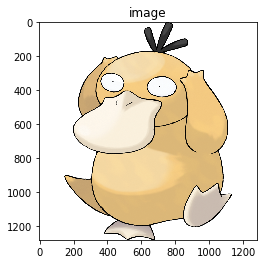

None


In [ ]:
low_score(case =8)

In [ ]:
!ls ./img/

001Bulbasaur.png   271Lombre.png	    541Swadloon.png
002Ivysaur.png	   272Ludicolo.png	    542Leavanny.png
003Venusaur.png    273Seedot.png	    543Venipede.png
004Charmander.png  274Nuzleaf.png	    544Whirlipede.png
005Charmeleon.png  275Shiftry.png	    545Scolipede.png
006Charizard.png   276Taillow.png	    546Cottonee.png
007Squirtle.png    277Swellow.png	    547Whimsicott.png
008Wartortle.png   278Wingull.png	    548Petilil.png
009Blastoise.png   279Pelipper.png	    549Lilligant.png
010Caterpie.png    280Ralts.png		    550Basculin-Red-Striped.png
011Metapod.png	   281Kirlia.png	    551Sandile.png
012Butterfree.png  282Gardevoir.png	    552Krokorok.png
013Weedle.png	   283Surskit.png	    553Krookodile.png
014Kakuna.png	   284Masquerain.png	    554Darumaka.png
015Beedrill.png    285Shroomish.png	    555Darmanitan-Standard.png
016Pidgey.png	   286Breloom.png	    556Maractus.png
017Pidgeotto.png   287Slakoth.png	    557Dwebble.png
018Pidgeot.png	   288Vigoroth.png	    558Crustle.png
019R

In [ ]:
csv = read_csv()

In [ ]:
copy = pandas.DataFrame(csv.csv,columns = ['Type1','Type2'])
copyname = pandas.DataFrame(csv.csv,columns=['Name_de'])

In [ ]:
import numpy as np


In [ ]:
copy = copy.fillna('pass')
label = []
copy = np.array(copy)

In [ ]:
copyname

,Name_de
0,Bisasam
1,Bisaknosp
2,Bisaflor
3,Glumanda
4,Glutexo
...,...
804,Muramura
805,Kopplosio
806,Zeraora
807,Meltan


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [ ]:
mlb = MultiLabelBinarizer()
label = mlb.fit_transform(copy)


#Save Image

In [ ]:
%%bash
tar -cf img.tar img/
cp img.tar /gdrive/My\ Drive/img.tar

# CNN Model

In [ ]:
import torchvision
from torch import nn
import torch.nn.functional as func
import torch
from torchvision import transforms
from torch import optim
import time
from torchvision.datasets import ImageFolder,DatasetFolder
from torch.utils.data import Dataset,DataLoader
from torchvision import models



In [ ]:
def default_loader(path):
    from torchvision import get_image_backend
    if get_image_backend() == 'accimage':
        return accimage_loader(path)
    else:
        return pil_loader(path)
        
IMG_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')


def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')


def accimage_loader(path):
    import accimage
    try:
        return accimage.Image(path)
    except IOError:
        # Potentially a decoding problem, fall back to PIL.Image
        return pil_loader(path)
class data_tensor(DatasetFolder):
  def __init__(self, root, transform=None, target_transform=None,
                 loader=default_loader, is_valid_file=None):
    super(data_tensor,self).__init__(root, loader, IMG_EXTENSIONS if is_valid_file is None else None,
                                          transform=transform,
                                          target_transform=target_transform,
                                          is_valid_file=is_valid_file)
    self.imgs = self.samples

  def __getitem__(self,index):
    path, target = self.samples[index]
    # print("samples{}".format(self.samples[index]))
    # print("index{}".format(index))
    sample = self.loader(path)
    if self.transform is not None:
        sample = self.transform(sample)
    if self.target_transform is not None:
        target = self.target_transform[target]

    return sample, target



In [ ]:
class iden_block(nn.Module):
  def __init__(self,in_channels,out_channels):
    super(iden_block,self).__init__()
    #Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
    #BatchNorm2d(num_features, eps=1e-05, momentum=0.1, affine=True)
    self.in_channels = in_channels
    self.out_channels = out_channels
    
    self.conv1=nn.Conv2d(in_channels,out_channels,kernel_size=1,stride=1,padding=0)
    self.batch1=nn.BatchNorm2d(out_channels)
    self.conv2=nn.Conv2d(out_channels,out_channels,kernel_size=3,stride=1,padding=1)
    self.batch2=nn.BatchNorm2d(out_channels)
    self.conv3 = nn.Conv2d(out_channels,in_channels,kernel_size=1,stride=1,padding=0)
    self.batch3 = nn.BatchNorm2d(out_channels)
    
  
  def forward(self,x):
    x_shortcut = x

    x = self.conv1(x)
    x = func.relu(self.batch1(x))
    x = self.conv2(x)
    x = func.relu(self.batch2(x))
    x = self.conv3(x)
    x = func.relu(self.batch3(x))
    x += x_shortcut

    return x


class conv_block(nn.Module):
  def __init__(self,in_channels,out_channels,stride):
    super(conv_block,self).__init__()
    #self.conv = nn.Conv2d()
    #self.batch=nn.BatchNorm2d()
    
    
    # self.conv1 = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=1,stride=1,padding=0)
    # self.batch1 = nn.BatchNorm2d(num_features=out_channels)
    # self.conv2 = nn.Conv2d(in_channels=out_channels,out_channels=out_channels,kernel_size=3,stride=1,padding=1)
    # self.batch2 = nn.BatchNorm2d(num_features=out_channels)
    # self.conv3 = nn.Conv2d(in_channels = out_channels,out_channels= out_channels*4,kernel_size=1,stride=1,padding=0)
    # self.batch3 = nn.BatchNorm2d(num_features = out_channels*4)

    # self.conv_s = nn.Conv2d(in_channels=in_channels,out_channels= out_channels*4,kernel_size=1,stride=1,padding=0)
    # self.batch_s = nn.BatchNorm2d(num_features= out_channels*4)
    
    self.in_channels=in_channels
    self.out_channels = out_channels
    self.stride = stride


    self.conv1 = nn.Conv2d(in_channels,out_channels,kernel_size=1,stride=stride,padding=0)
    self.batch1 = nn.BatchNorm2d(out_channels)
    self.conv2 = nn.Conv2d(out_channels,out_channels,kernel_size=3,padding=1)
    self.batch2 = nn.BatchNorm2d(out_channels)
    self.conv3 = nn.Conv2d(out_channels,out_channels*4,kernel_size=1,padding=0)
    self.batch3 = nn.BatchNorm2d(out_channels*4)

    self.conv_s = nn.Conv2d(in_channels,out_channels*4,kernel_size=1,stride=stride,padding=0)
    self.batch_s = nn.BatchNorm2d(out_channels*4)

  def forward(self,x):
    x_shortcut = x

    x = self.conv1(x)
    x = func.relu(self.batch1(x))
    #x = self.active(x)

    x = self.conv2(x)
    x = func.relu(self.batch2(x))
    #x = self.active(x)

    x = self.conv3(x)
    x = self.batch3(x)

    x_shortcut = self.conv_s(x_shortcut)
    x_shortcut = self.batch_s(x_shortcut)

    x += x_shortcut

    return func.relu(x)

In [ ]:
class resnet(nn.Module):
  def __init__(self):
    super(resnet,self).__init__()
    #con_out_shape = (in_shape - kernal_size + 2* padding)/2 + 1
    self.conv1 = nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1,bias=False)
    self.bn1 =nn.BatchNorm2d(64)
    self.active = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d(kernel_size=3,stride=2,padding=0)
    #stage1 shape(conv_in:64,out:256;iden_in&out:256)
    self.conv_block_1 = conv_block(in_channels=64,out_channels=64,stride=1)
    self.iden_block_1 = iden_block(in_channels=256,out_channels=256)
    #stage2 shape(conv_in:256,out:128,iden_in&out:512)
    self.conv_block_2 = conv_block(in_channels=256,out_channels=128,stride=2)
    self.iden_block_2 = iden_block(in_channels=512,out_channels=512)
    #stage3 shape(conv_in:512,out:256,iden_in&out:1024)
    self.conv_block_3 = conv_block(in_channels=512,out_channels=256,stride=2)
    self.iden_block_3 = iden_block(in_channels=1024,out_channels=1024)
    #stage4 shape(conv_in:1024,out:512,iden_in&out:2048)
    self.conv_block_4 = conv_block(in_channels=1024,out_channels=512,stride=2)
    self.iden_block_4 = iden_block(in_channels=2048,out_channels=2048)

    #stage5 filtters = 32 / 2^4 = 2;shape(pool:kernel=2)
    
    self.avgpool = nn.AvgPool2d(kernel_size=2,stride=1)
    self.fc = nn.Linear(2048,2)

  def forward(self,x):
    #stage 0
    x = self.conv1(x)  #out_shape [64,(16,16)]
    x = self.bn1(x)
    x = self.active(x)
    #x = self.maxpool(x)

    #stage 1
    x = self.conv_block_1(x) #out_shape[256,(16,16)]
    x = self.iden_block_1(x)
    x = self.iden_block_1(x)
    x = self.iden_block_1(x)
    
    #stage 2
    x = self.conv_block_2(x) #out_shape[512,(8,8)]
    x = self.iden_block_2(x)
    x = self.iden_block_2(x)
    x = self.iden_block_2(x)
    x = self.iden_block_2(x)


    #stage 3
    x = self.conv_block_3(x) #out_shape[1024,(4,4)]
    x = self.iden_block_3(x)
    x = self.iden_block_3(x)
    x = self.iden_block_3(x)
    
    #stage 4
    x = self.conv_block_4(x) #out_shape[2048,(2,2)]
    x = self.iden_block_4(x)
    x = self.iden_block_4(x)
    x = self.iden_block_4(x)
    
    #stage 5
    x = self.avgpool(x)#out_shape[2048,(1,1)]
    x = x.view(x.size(0),-1)
    x = self.fc(x,activation='softmax')

    return x

In [ ]:
model = resnet()
optimizer = optim.Adam(model.parameters(),lr = 0.1)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
transform = transforms.Compose([transforms.RandomResizedCrop(32,scale=(0.5,1.0)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])


In [ ]:
dataset = data_tensor('./dataset/',transform =transform,target_transform=read_csv().csv.Name)
dataset = data_tensor('./dataset/',transform =transform,target_transform=None)

In [ ]:
dataset.class_to_idx

In [ ]:
train = DataLoader(dataset=dataset,batch_size=32,shuffle=True)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
count = 0
for epoch in range(10):
  running_loss = 0.0
  correct = 0
  total = 0

  for i in train:
    
    inputs,label = i
    inputs,label = inputs.to(device),label.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs,label)
    loss.backward()
    optimizer.step()

    _, pred = torch.max(outputs, 1)
    correct += (pred == label).sum().item()
    total += label.size(0)
    count += 1
    if count %10 == 0:
      print(' [epoch:%d, step:%d] loss: %.4f' %(epoch + 1, count+1, running_loss / 50))
      running_loss = 0.0

    running_loss += loss.item()
  acc = float(correct) / total
  print('train_set acc:{:.2f}%'.format(acc * 100.0))

In [ ]:
# !wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [ ]:
# dataset = data_tensor('./PetImages/',transform =transform,target_transform=None)

# Name to type network

In [ ]:
copy_label = pandas.DataFrame(csv.csv,columns = ['Type1','Type2'])
#ドイツ語の関連性が高そうのため、ドイツ語をベクトルにする
copy_name = pandas.DataFrame(csv.csv,columns=['Name_de'])
label = copy_label.fillna('pass')
label = np.array(label)
copy_name = np.array(copy_name)
mlb = MultiLabelBinarizer()
label = mlb.fit_transform(label)
mlb.classes_

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', 'pass'], dtype=object)

In [ ]:
print(label.shape)
print(label[10])

(809, 19)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [ ]:
print(copy_name[0])

['Bisasam']


In [ ]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec,keyedvectors

In [ ]:
path = get_tmpfile("word2vec.model")

In [ ]:
wvmodel = Word2Vec(copy_name, size=100, window=1, min_count=1, workers=4)

In [ ]:
wvmodel.train(copy_name,total_words=809,epochs=1)

(809, 809)

In [ ]:
word_vector = []
for i in copy_name:
  c = wvmodel.wv[i]
  c = np.asarray(c)
  c = c.flatten()
  word_vector.append(c)


In [ ]:
word_vector = np.array(word_vector)
word_vector[0]

array([ 1.7452338e-03,  4.1478346e-03,  1.3121603e-03, -1.2105095e-03,
       -1.6790542e-03, -1.5921447e-03, -4.9108397e-03, -4.2594299e-03,
       -4.1710893e-03, -3.6913578e-03, -3.1123958e-03,  3.4398814e-03,
        1.9135287e-03,  4.0505351e-03, -3.7819694e-03,  1.5767815e-03,
       -3.5239328e-03, -4.6112371e-04,  4.1336063e-03, -4.3544285e-03,
       -3.1799520e-03,  2.8787500e-03,  2.2701775e-03,  2.4407888e-03,
       -1.7191208e-03,  3.4490268e-04, -3.4649335e-04, -3.8406225e-03,
       -4.5092423e-03, -9.6836180e-04,  3.0598841e-03,  4.4974820e-03,
        4.5927899e-04, -2.4699103e-03, -2.3203902e-03, -8.6901087e-04,
       -3.7375144e-03, -2.6224474e-03,  3.5192980e-03, -1.0260108e-03,
       -3.4752723e-03,  4.7117323e-03,  2.6994580e-03, -2.8718209e-03,
        1.4568840e-03, -3.0663321e-03, -3.2519731e-03,  1.1844120e-03,
        2.9653960e-04,  4.2135753e-03, -6.1010948e-04,  2.8550983e-03,
       -9.1309019e-04,  2.2784835e-03,  3.4967584e-03, -4.1309372e-03,
      

In [ ]:
input_dim = word_vector.shape[1]
label_dim = label.shape[1]

In [ ]:
from keras.models import Sequential

model = Sequential()


Using TensorFlow backend.


In [ ]:
from keras.layers import Dense

model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(32,activation='relu'))
model.add(Dense(label_dim, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model.fit(word_vector, label, epochs=2000, batch_size=16,validation_split=0.1)

Train on 728 samples, validate on 81 samples
Epoch 1/2000
728/728 [==============================] - 0s 250us/step - loss: 0.0271 - categorical_accuracy: 0.3242 - val_loss: 1.3782 - val_categorical_accuracy: 0.0370
Epoch 2/2000
728/728 [==============================] - 0s 234us/step - loss: 0.0277 - categorical_accuracy: 0.3297 - val_loss: 1.3852 - val_categorical_accuracy: 0.0370
Epoch 3/2000
728/728 [==============================] - 0s 227us/step - loss: 0.0269 - categorical_accuracy: 0.3118 - val_loss: 1.3858 - val_categorical_accuracy: 0.0247
Epoch 4/2000
728/728 [==============================] - 0s 228us/step - loss: 0.0268 - categorical_accuracy: 0.3242 - val_loss: 1.3897 - val_categorical_accuracy: 0.0247
Epoch 5/2000
728/728 [==============================] - 0s 237us/step - loss: 0.0268 - categorical_accuracy: 0.3242 - val_loss: 1.3826 - val_categorical_accuracy: 0.0370
Epoch 6/2000
728/728 [==============================] - 0s 217us/step - loss: 0.0271 - categorical_accura

In [ ]:
#現在の段階は、訓練した単語のベクトルのみ、表示できる
re = model.predict(word_vector)[0]
mlb.classes_[np.argpartition(re,-2)[-2:]]


array(['Grass', 'Poison'], dtype=object)

In [ ]:
r = requests.get('https://www.google.com/search?q=喷火龙&tbm=isch')

In [ ]:
xmlcontent = etree.HTML(r.text)
urllist = xmlcontent.xpath("//div[@class='islrc']/div/a/div[@style]/img/@data-iurl")
# urllist = re.findall(r'media.*\.png',urllist[0])
# r = requests.get("http://"+urllist[0])
print(urllist)

[]


グーグルの画像検索から画像を取りたいが、chromeで行けるXpathはrequestで行けなかった

謎

#課題9-13

完成したのは12だけです

[
 Name to type network](https://colab.research.google.com/drive/1ABR9P7aqfiLag2hIsgf49CszDxZoBWsq#scrollTo=VJQ1b2WyO_wA&line=2&uniqifier=1)
 blockを実行した後`high_score(case=12)`を実行してください

In [ ]:
class high_score(read_csv):
  def __init__(self,case):
    super().__init__()
    self.case = case
    case_dir = {9:self.p9,10:self.p10,11:self.p11,12:self.p12,13:self.p13}
    global wvmodel
    global model
    global mlb
    print(case_dir[self.case]())

  def p9(self):
    pass
  def p10(self):
    pass
  def p11(self):
    pass
  def p12(self):
    get_input =[]
    l = []
    get_input.append(input("Pokemon Name"))
    l.append(get_input*3)
    wvmodel.train(l,total_words=1,epochs=1)
    print(wvmodel.train(l,total_words=1,epochs=1))
    _wv = wvmodel.wv[get_input]
    _re = model.predict(_wv)
    mlb.classes_[np.argpartition(_re,-2)[-2:]]
  def p13(self):
    pass

In [ ]:
high_score(case=12)

Pokemon Namesadqw
(0, 3)


KeyError: ignored

問題点

含めないwordsに与える時、
words2vec.train()を使っても、そのwords`not in vocabulary`エラーが発生しました

また、単語ベクトルにしましたが、関連がある名前はベクトルが遠い、その面も調整が必要です。

対策として、単語を語根化にして方が行けるそうです。特にドイツ語の語根の関連性が高そうです。時間のせいで、今回も失敗しまいました。

必死に書きまして、問題を全力に解けました。書きの点数をください！

In [ ]:
sentences = [["dragon"]]
# wvmodel.build_vocab(sentences)
wvmodel.train(sentences,total_words=1,epochs=5)

NameError: ignored

In [ ]:
wvmodel.wv['Bisaflor']

KeyError: ignored